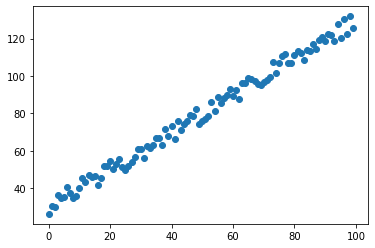

In [1]:
# Data 수집
import matplotlib.pyplot as plt
import numpy as np
import random

def data_gen(n, b, v):
    x = np.zeros(shape = (n,2))
    y = np.zeros(shape = n)
    
    for i in range(0,n):
        x[i][0] = 1
        x[i][1] = i
        y[i] = (i+b) + random.uniform(0,1)*v
    return x, y

x, y = data_gen(100, 25, 10)
plt.plot(x[:,1], y, 'o')

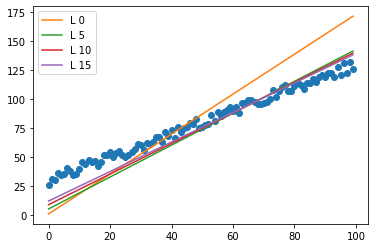

In [4]:
def g_descent(x, y, th, ap, m, ns): # 간격조정하는 반복횟수가 ns 데이터의 개수가 m개 
    xT = x.T # np.transpose(x), x.transpose(), x.T
    th_l = []
    cost_l = []
    for i in range(0, ns):
        h = np.dot(x, th) # np.dot(x,th), x.dot(th)
        loss = h-y # 오차 생성
        cost = np.sum(loss**2)/(2*m)# cost function
        g = np.dot(xT, loss)/m
        th = th - ap*g
        if i %250 == 0: # 갱신하는거. 5000/250 한번씩 걸릴 때 마다. 갱신.
            th_l.append(th)
        cost_l.append(cost)
    return th, np.array(th_l), cost_l
m, n = np.shape(x)
ns = 5000
ap = 0.0005
th = np.ones(n)
th, th_l, cost_l = g_descent(x, y, th, ap, m, ns)
y_p_step = np.dot(x, th_l.T)
plt.plot(x[:,1], y, 'o')
for i in range(0, 20, 5):
    plt.plot(x[:,1],y_p_step[:,i], label = f'L {i}')
plt.legend()    

세타와 cost function에 대해서 생각해줘야한다.

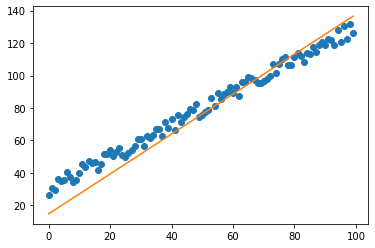

In [5]:
y_p = np.dot(x, th)
plt.plot(x[:,1], y, 'o')
plt.plot(x[:,1], y_p)

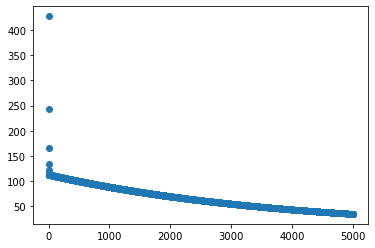

In [6]:
ck_i = range(len(cost_l))
plt.scatter(ck_i, cost_l)